In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1,linestyle="-"):
    try:
        res=np.polyfit(pd.to_numeric(x_data),pd.to_numeric(y_data),deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1],linestyle=linestyle)
    return coeff,k_err

def poly_plot3(ax,data,x,y,c='b',limits=(0,0),deg=1,linestyle="-"):
    if limits==(0,0):
        coeffs=poly_plot2(data[x].array,data[y].array,data[x].min(),data[x].max(),ax,c,deg=deg,linestyle=linestyle)
    else:
        coeffs=poly_plot2(data[x].array,data[y].array,limits[0],limits[1],ax,c,deg=deg,linestyle=linestyle)
    return coeffs

def plot_line (ax,k=0,b=0,limits=(0,0),c='b',vert=False,x0=0,label=""):
    x1=limits[0]
    x2=limits[1]
    if vert:
        ax.plot([x0,x0],[x1,x2],c=c,label="x={}".format(x0)+label,linestyle="--")
        return
    ax.plot([x1,x2],[k*x1+b,k*x2+b],c=c,label=label)
    
def gausse(x,a,b,c):
    return a*np.exp( -(x-b)**2/(2*c**2) )

def gausse_fit(data,x,y,limits,p0):
    x0=limits[0]
    x1=limits[1]
    data2=data[ (data[x]>=x0)&(data[x]<=x1) ].copy()
    k,_=curve_fit(gausse, data2[x],data2[y],p0,maxfev=5000)
    return k[0],k[1],k[2]

In [3]:
data1=pd.read_csv("table1.csv")
data2=pd.read_csv("table2.csv")
data3=pd.read_csv("table3.csv")
data4=pd.read_csv("table4.csv")
data5=pd.read_csv("table5.csv")
data6=pd.read_csv("table6.csv")

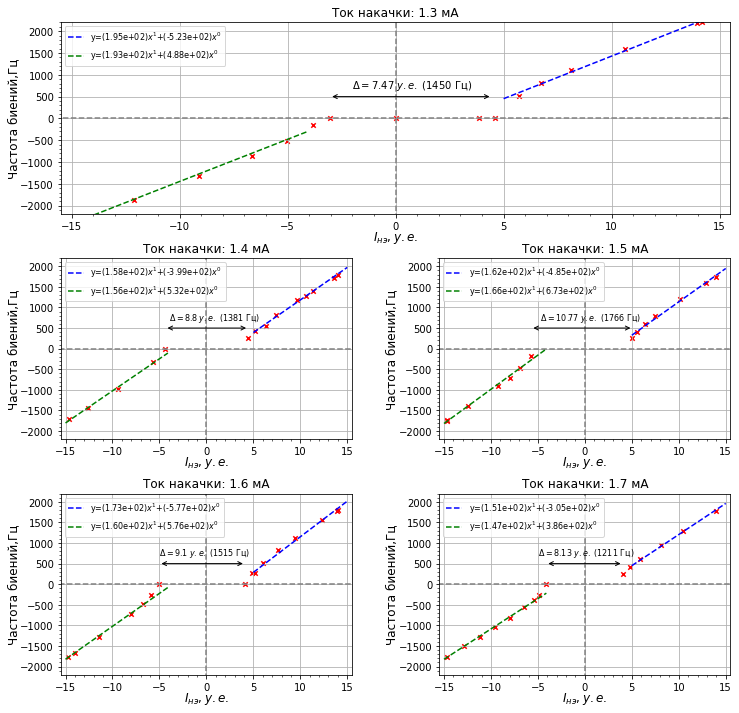

In [61]:
fig,axes=plt.subplots(3,2,figsize=(12,12),gridspec_kw={"wspace":0.3,"hspace":0.3})
ax2=plt.subplot(3,1,1)
ax3=plt.subplot(3,2,3)
ax4=plt.subplot(3,2,4)
ax5=plt.subplot(3,2,5)
ax6=plt.subplot(3,2,6)

axes_lst=[ax2,ax3,ax4,ax5,ax6]

# data1.plot(ax=ax1,kind="scatter",x="I",y="Drift")
data2.plot(ax=ax2,kind="scatter",x="I",y="Drift",marker="x",c="r")
data3.plot(ax=ax3,kind="scatter",x="I",y="Drift",marker="x",c="r")
data4.plot(ax=ax4,kind="scatter",x="I",y="Drift",marker="x",c="r")
data5.plot(ax=ax5,kind="scatter",x="I",y="Drift",marker="x",c="r")
data6.plot(ax=ax6,kind="scatter",x="I",y="Drift",marker="x",c="r")

poly_plot3(ax=ax2,data=data2[10:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax2,data=data2[0:6],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")


poly_plot3(ax=ax3,data=data3[5:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax3,data=data3[0:4],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")

poly_plot3(ax=ax4,data=data4[7:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax4,data=data4[0:7],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")

poly_plot3(ax=ax5,data=data5[8:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax5,data=data5[0:5],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")

poly_plot3(ax=ax6,data=data6[9:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax6,data=data6[0:7],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")


ax3.legend()

# ax2.legend()

for ax in axes_lst:
    ax.grid()
    ax.set_ylabel("Частота биений,Гц",labelpad=0,size=12)
    ax.set_xlabel("$I_{нэ},у.е.$",labelpad=-2,size=12)
    ax.set_xlim(-15.5,15.5)
    ax.set_ylim(-2200,2200)
    ax.vlines(x=0,ymin=-2300,ymax=2300,linestyle="--",color="gray")
    ax.hlines(y=0,xmin=-16.5,xmax=16.5,linestyle="--",color="gray")
    ax.minorticks_on()
    ax.legend(fontsize=8)


# ax1.set_title("Ток накачки: 1,",size=12)
ax2.set_title("Ток накачки: 1.3 мА",size=12)
ax3.set_title("Ток накачки: 1.4 мА",size=12)
ax4.set_title("Ток накачки: 1.5 мА",size=12)
ax5.set_title("Ток накачки: 1.6 мА",size=12)
ax6.set_title("Ток накачки: 1.7 мА",size=12)


ax2.annotate("",xy=(-3.03,500),xycoords="data",xytext=(4.44,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax2.annotate(r"$\Delta=7.47\; у.е. $ (1450 Гц)",xy=(-2,700))


ax3.annotate("",xy=(-4.36,500),xycoords="data",xytext=(4.44,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax3.annotate(r"$\Delta=8.8\; у.е.$ (1381 Гц)",xy=(-4,700),fontsize=8)

ax4.annotate("",xy=(-5.70,500),xycoords="data",xytext=(5.07,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax4.annotate(r" $\Delta=10.77\;у.е.$ (1766 Гц)",xy=(-5,700),fontsize=8)

ax5.annotate("",xy=(-5,500),xycoords="data",xytext=(4.10,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax5.annotate(r"$\Delta=9.1\;у.е.$ (1515 Гц)",xy=(-5,700),fontsize=8)

ax6.annotate("",xy=(-4.11,500),xycoords="data",xytext=(4.02,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax6.annotate(r"$\Delta=8.13\;у.е.$ (1211 Гц)",xy=(-5,700),fontsize=8)

fig.savefig("graph1.pdf")

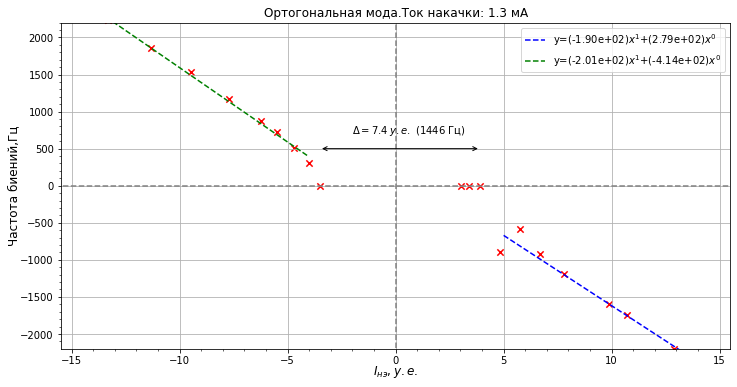

In [67]:
fig,ax=plt.subplots(figsize=(12,6))

data1.plot(ax=ax,kind="scatter",x="I",y="Drift",marker="x",s=40,c="r")

poly_plot3(ax=ax,data=data1[13:],x="I",y="Drift",limits=(5,15),c="b",linestyle="--")
poly_plot3(ax=ax,data=data1[0:9],x="I",y="Drift",limits=(-15,-4.1),c="green",linestyle="--")

ax.set_ylabel("Частота биений,Гц",labelpad=0,size=12)
ax.set_xlabel("$I_{нэ},у.е.$",labelpad=-2,size=12)
ax.set_xlim(-15.5,15.5)
ax.set_ylim(-2200,2200)
ax.vlines(x=0,ymin=-2300,ymax=2300,linestyle="--",color="gray")
ax.hlines(y=0,xmin=-16.5,xmax=16.5,linestyle="--",color="gray")
ax.minorticks_on()

ax.legend()

ax.set_title("Ортогональная мода.Ток накачки: 1.3 мА",size=12)
ax.annotate("",xy=(-3.50,500),xycoords="data",xytext=(3.90,500),arrowprops=dict(facecolor='r',arrowstyle="<->"))
ax.annotate(r"$\Delta=7.4\; у.е.$ (1446 Гц)",xy=(-2,700))

ax.grid()

fig.savefig("graph2.pdf")

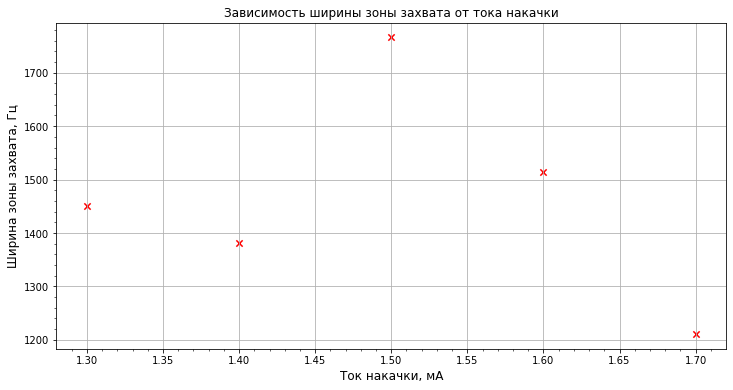

In [62]:
fig,ax=plt.subplots(figsize=(12,6))

y=np.array([1450,1381,1766,1515,1211])
x=np.array([1.3,1.4,1.5,1.6,1.7])

ax.scatter(x=x,y=y,marker="x",c="r",s=40)

ax.set_title("Зависимость ширины зоны захвата от тока накачки",size=12)
ax.set_xlabel("Ток накачки, мА",size=12)
ax.set_ylabel("Ширина зоны захвата, Гц",size=12)
ax.grid()
ax.minorticks_on()

fig.savefig("graph3.pdf")